<a href="https://colab.research.google.com/github/shashi36-github/Heart-disease-prediction/blob/main/Heart_diseases_prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
!pip install pandas_profiling
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 17.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=f2ed926787c6b103d9360f5f081b6a77bf011be8c5837cc5bcfa567af668e135
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

<ipython-input-1-222e2cf69900>:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [ ]:
data = pd.read_csv('/content/Heart Disease.csv')

In [ ]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       500 non-null    int64  
 1   sex       500 non-null    int64  
 2   cp        500 non-null    int64  
 3   trestbps  500 non-null    int64  
 4   chol      500 non-null    int64  
 5   fbs       500 non-null    int64  
 6   restecg   500 non-null    int64  
 7   thalach   500 non-null    int64  
 8   exang     500 non-null    int64  
 9   oldpeak   500 non-null    float64
 10  slope     500 non-null    int64  
 11  ca        500 non-null    int64  
 12  thal      500 non-null    int64  
 13  target    500 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 54.8 KB


In [ ]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
data.duplicated().sum()

232

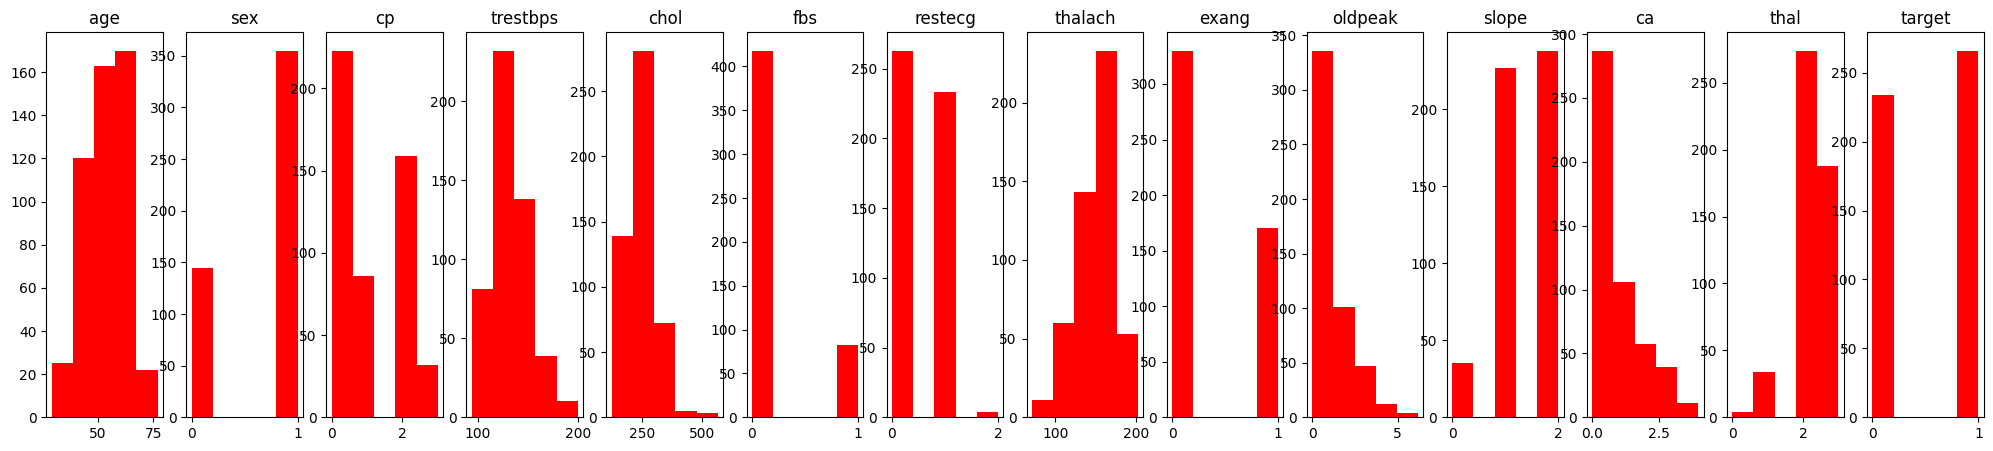

In [ ]:
fig, axs = plt.subplots(ncols=len(data.columns), figsize=(25, 5))
for i, col in enumerate(data.columns):
    axs[i].hist(data[col], bins=5, color='red')
    axs[i].set_title(col)
plt.show()

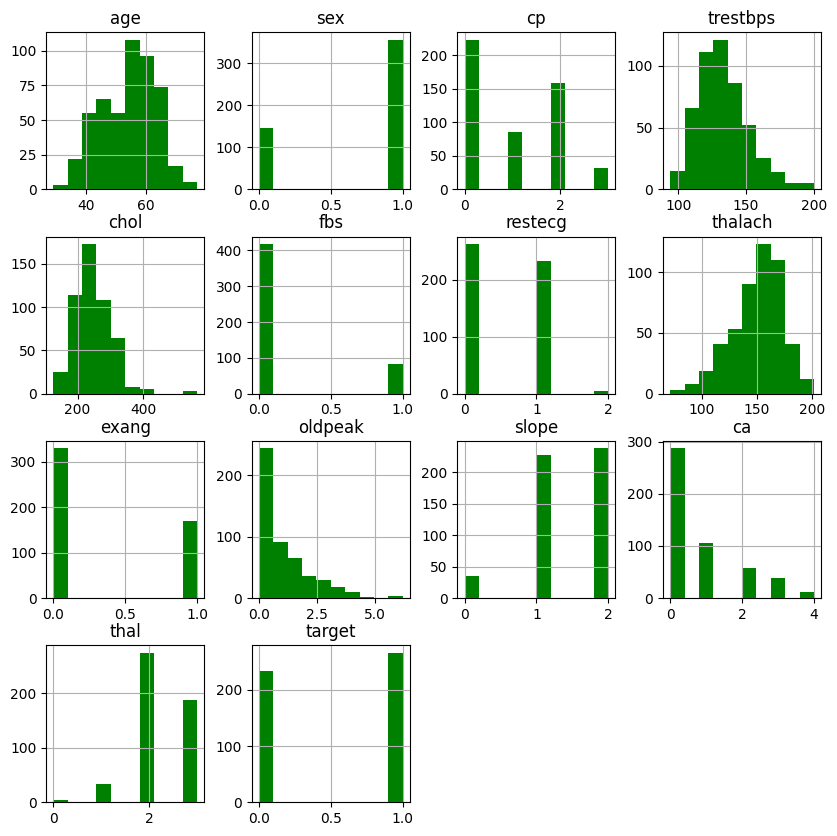

In [ ]:
data.hist(figsize=(10, 10), bins=10,color = 'green')
plt.show()

In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000
mean,54.020000,0.710000,1.000000,132.458000,248.130000,0.164000,0.482000,150.188000,0.340000,1.02540,1.406000,0.762000,2.292000,0.532000
std,9.217023,0.454216,1.010962,18.057918,55.444109,0.370646,0.515954,23.307835,0.474183,1.17117,0.618003,1.069413,0.625715,0.499475
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,137.000000,0.000000,0.00000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,243.000000,0.000000,0.000000,152.000000,0.000000,0.80000,1.000000,0.000000,2.000000,1.000000
75%,60.250000,1.000000,2.000000,140.000000,282.000000,0.000000,1.000000,168.000000,1.000000,1.60000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,4.000000,3.000000,1.000000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

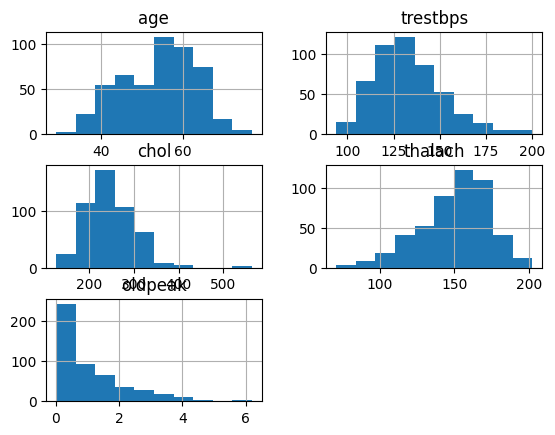

In [ ]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].hist()

In [ ]:
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']].skew()

age        -0.215636
trestbps    0.735403
chol        1.306845
thalach    -0.563429
oldpeak     1.359754
dtype: float64

array([[<Axes: title={'center': 'sex'}>, <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'fbs'}>],
       [<Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'slope'}>],
       [<Axes: title={'center': 'ca'}>, <Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>]], dtype=object)

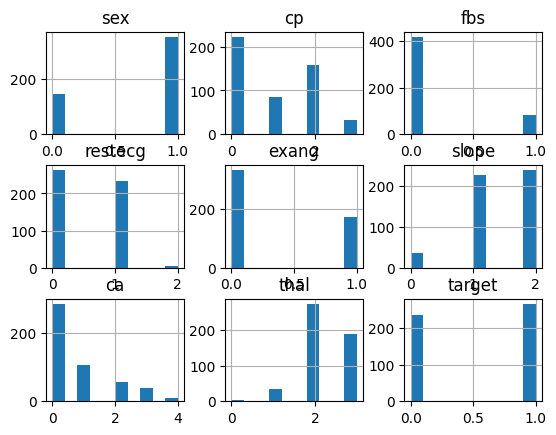

In [ ]:
data[['sex', 'cp', 'fbs', 'restecg', 'exang','slope','ca','thal','target']].hist()

In [ ]:
corr_matrix = data.corr()

In [ ]:
print(corr_matrix)

               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.079988 -0.135277  0.266291  0.300081  0.140411   
sex      -0.079988  1.000000 -0.026185 -0.041435 -0.233090  0.056899   
cp       -0.135277 -0.026185  1.000000 -0.004171 -0.147981  0.080222   
trestbps  0.266291 -0.041435 -0.004171  1.000000  0.086427  0.221999   
chol      0.300081 -0.233090 -0.147981  0.086427  1.000000  0.003641   
fbs       0.140411  0.056899  0.080222  0.221999  0.003641  1.000000   
restecg  -0.181128 -0.077901  0.076839 -0.110208 -0.157294 -0.120762   
thalach  -0.408694 -0.077750  0.346144 -0.024264 -0.093489 -0.023526   
exang     0.152505  0.123749 -0.438943  0.105116  0.115626  0.103989   
oldpeak   0.220576  0.116342 -0.208693  0.162270  0.076354  0.025932   
slope    -0.195632 -0.043763  0.157170 -0.105046 -0.066171 -0.090043   
ca        0.214368  0.138168 -0.179801  0.130080  0.066532  0.154284   
thal      0.097670  0.171625 -0.196417  0.129141  0.170525 -0.03

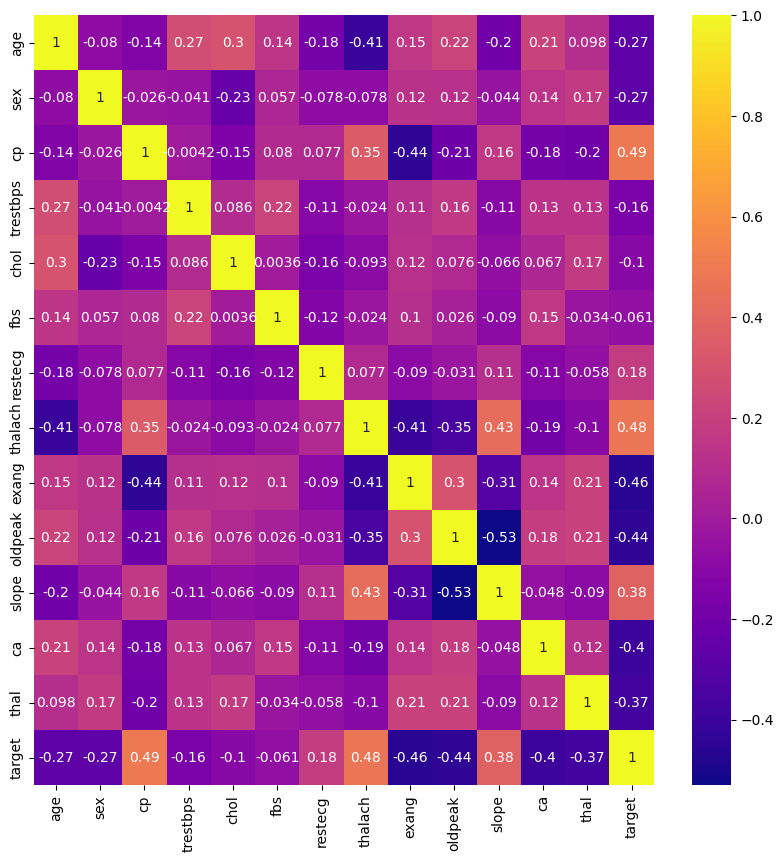

In [ ]:
corr = data.corr()
plt. figure(figsize=(10, 10))
sns.heatmap(corr,annot = True, cmap='plasma')
plt.show()

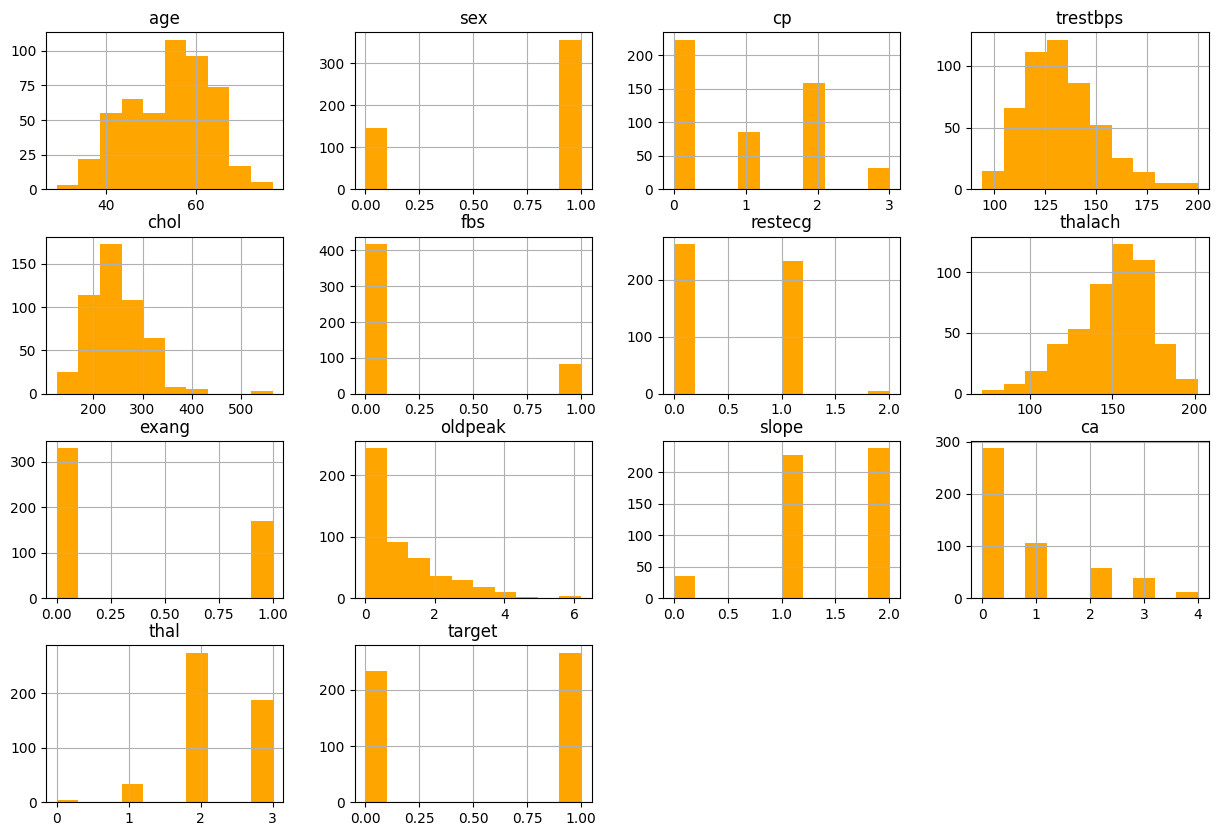

In [ ]:
data.hist(figsize=(15, 10), bins=10,color='orange')
plt.show()

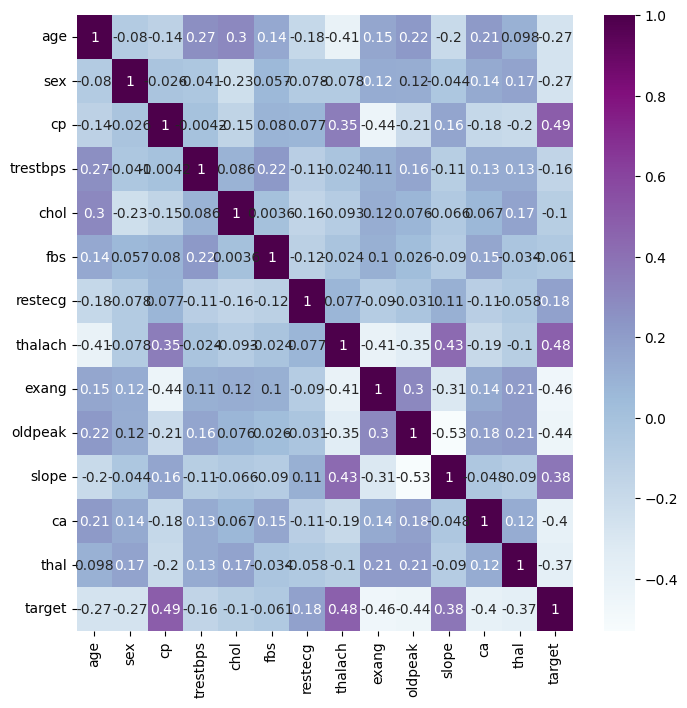

In [ ]:
corr = data.corr()
plt. figure(figsize=(8,8))
sns.heatmap(corr,annot = True, cmap='BuPu')
plt.show()

In [ ]:
data = pd.read_csv('/content/Heart Disease.csv')

<Figure size 1200x1000 with 0 Axes>

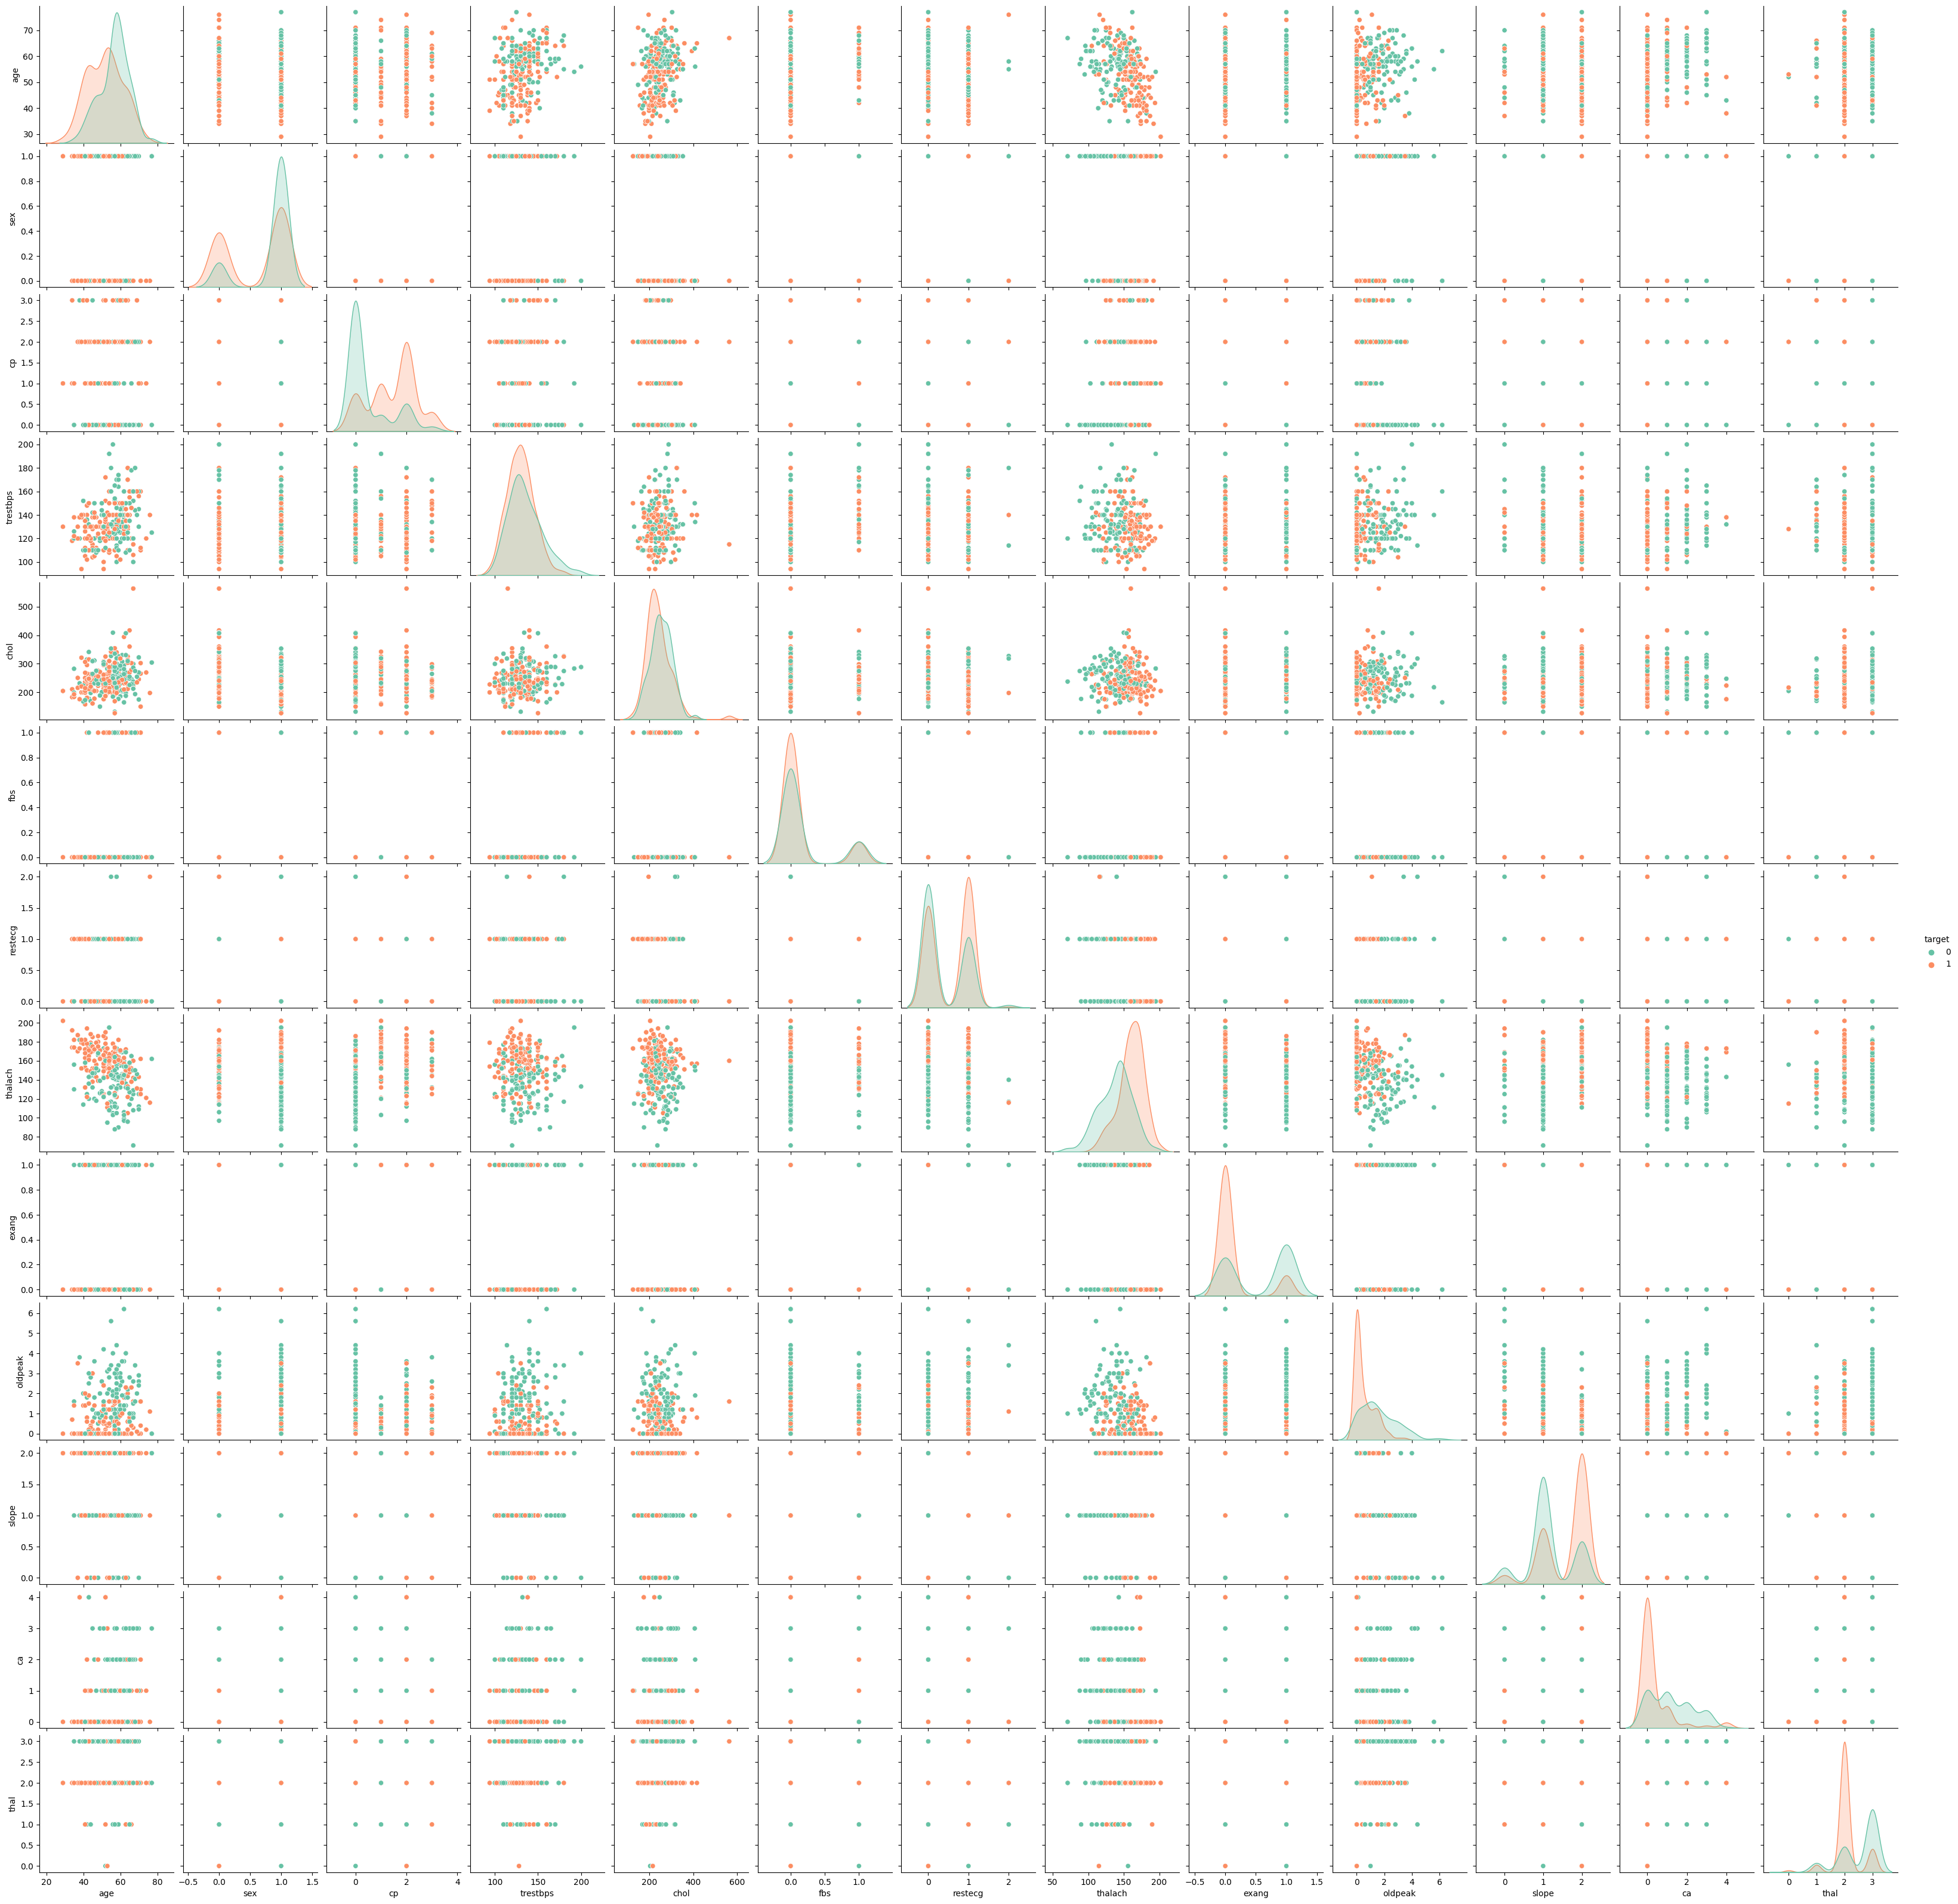

In [ ]:
plt.figure(figsize=(12,10))
sns.pairplot(data=data, hue='target', palette='Set2')
plt.show()

In [ ]:
data['sex'].value_counts()

1    355
0    145
Name: sex, dtype: int64

In [ ]:
data['cp'].value_counts()

0    223
2    159
1     86
3     32
Name: cp, dtype: int64

In [ ]:
data['fbs'].value_counts()

0    418
1     82
Name: fbs, dtype: int64

In [ ]:
data['restecg'].value_counts()

0    263
1    233
2      4
Name: restecg, dtype: int64

In [ ]:
data['exang'].value_counts()

0    330
1    170
Name: exang, dtype: int64

In [ ]:
data['slope'].value_counts()

2    238
1    227
0     35
Name: slope, dtype: int64

In [ ]:
data['ca'].value_counts()

0    287
1    106
2     57
3     39
4     11
Name: ca, dtype: int64

In [ ]:
data['thal'].value_counts()

2    274
3    188
1     34
0      4
Name: thal, dtype: int64

In [ ]:
data['target'].value_counts()

1    266
0    234
Name: target, dtype: int64

In [ ]:
data['total_risk_factor'] = 0

In [ ]:
data.loc[data['trestbps'] > 140, 'total_risk_factor'] += 1
data.loc[data['chol'] > 240, 'total_risk_factor'] += 1
data.loc[data['fbs'] > 120, 'total_risk_factor'] += 1
data.loc[data['ca'] >= 1, 'total_risk_factor'] += 1
data.loc[data['thal'] == 3, 'total_risk_factor'] += 1

In [ ]:
print(data[['trestbps', 'chol', 'fbs', 'ca', 'thal', 'total_risk_factor']])

     trestbps  chol  fbs  ca  thal  total_risk_factor
0         125   212    0   2     3                  2
1         140   203    1   0     3                  1
2         145   174    0   0     3                  2
3         148   203    0   1     3                  3
4         138   294    1   3     2                  2
..        ...   ...  ...  ..   ...                ...
495       135   234    0   0     3                  1
496       180   274    1   0     3                  3
497       154   232    0   1     2                  2
498       140   239    0   0     2                  0
499       142   177    0   0     2                  1

[500 rows x 6 columns]


In [ ]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,total_risk_factor
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,2
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,1
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,2
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,59,1,0,135,234,0,1,161,0,0.5,1,0,3,1,1
496,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0,3
497,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0,2
498,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1,0


In [ ]:
x = data.drop('target', axis=1)
y = data['target']

In [ ]:
print('Variabel independen:')
print(x.head())

print('\nVariabel dependen:')
print(y.head())

Variabel independen:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  total_risk_factor  
0   2     3                  2  
1   0     3                  1  
2   0     3                  2  
3   1     3                  3  
4   3     2                  2  

Variabel dependen:
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_data = pd.DataFrame(x_scaled, columns=x.columns)

In [ ]:
print(x_scaled_data)

          age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.675325  1.0  0.000000     0.625  0.375887  0.0      0.5  0.831683   
1    0.688312  1.0  0.000000     0.700  0.359929  1.0      0.0  0.767327   
2    0.909091  1.0  0.000000     0.725  0.308511  0.0      0.5  0.618812   
3    0.792208  1.0  0.000000     0.740  0.359929  0.0      0.5  0.797030   
4    0.805195  0.0  0.000000     0.690  0.521277  1.0      0.5  0.524752   
..        ...  ...       ...       ...       ...  ...      ...       ...   
495  0.766234  1.0  0.000000     0.675  0.414894  0.0      0.5  0.797030   
496  0.883117  1.0  0.666667     0.900  0.485816  1.0      0.0  0.742574   
497  0.740260  1.0  0.333333     0.770  0.411348  0.0      0.0  0.811881   
498  0.701299  1.0  0.000000     0.700  0.423759  0.0      0.5  0.792079   
499  0.597403  0.0  0.666667     0.710  0.313830  0.0      0.0  0.792079   

     exang   oldpeak  slope    ca      thal  total_risk_factor  
0      0.0  0.161290  

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score

model = DecisionTreeClassifier()

scores = cross_val_score(model, x_scaled, y, cv=5)
print("Accuracy with cross-validation: %.2f with standard deviation %.2f" % (scores.mean(), scores.std()))

Accuracy with cross-validation: 0.93 with standard deviation 0.03
